<a href="https://colab.research.google.com/github/Yasmine-edl/Math-matiques-statistiques/blob/main/Equations_differentielles_Yasmine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

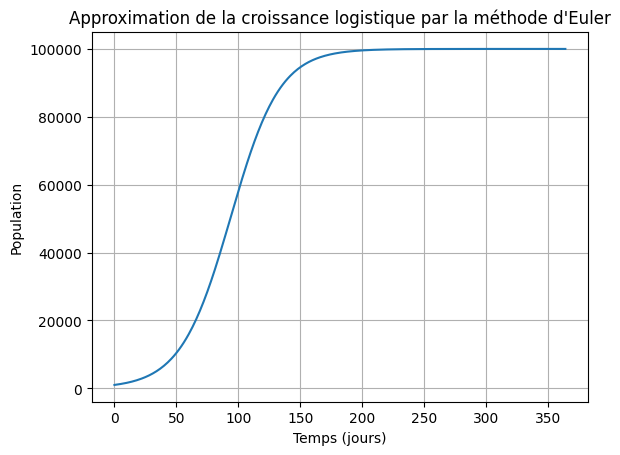

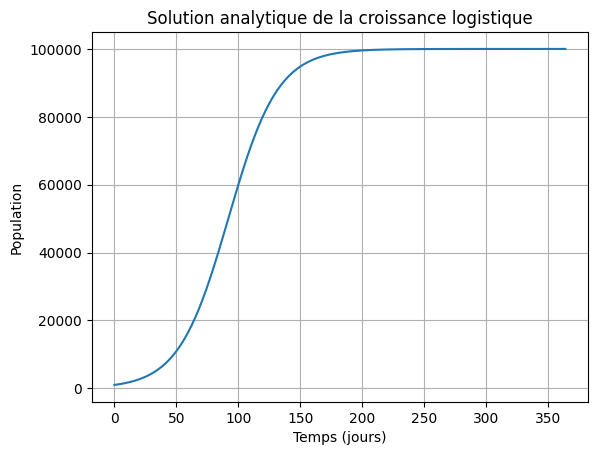

Erreur quadratique moyenne (MSE): 500427.2136298552


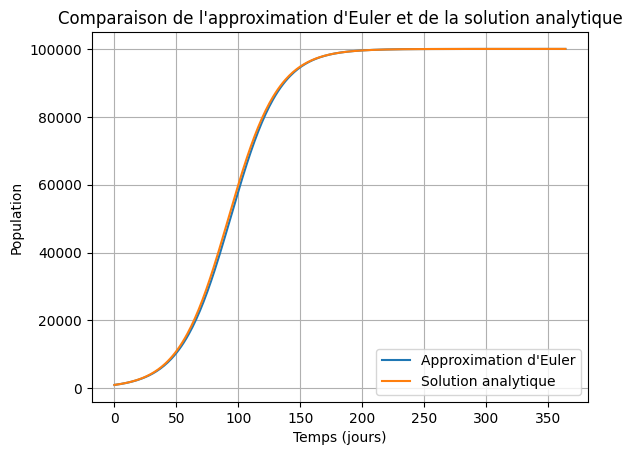

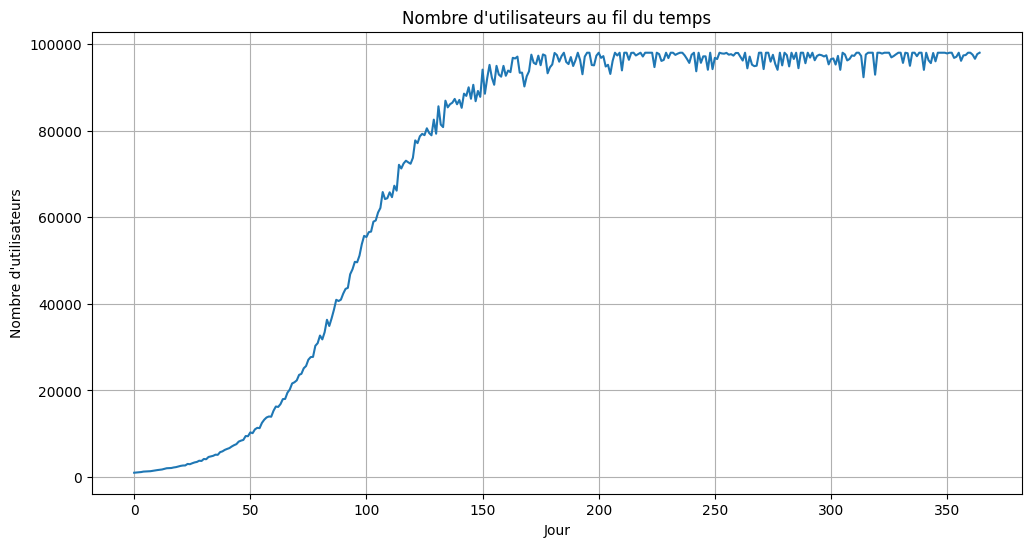

Jour approximatif de saturation: 150
Jour approximatif à 50% de saturation: 95
MSE entre 0 et 30 jours (Euler): 7638.900127349003
MSE entre 0 et 30 jours (Analytique): 19903.892776147797
MSE entre 30 et 90 jours (Euler): 1930525.6629492636
MSE entre 30 et 90 jours (Analytique): 6258277.778831539
MSE entre 90 et 180 jours (Euler): 15452922.843337826
MSE entre 90 et 180 jours (Analytique): 22085897.695222434
MSE entre 180 et 365 jours (Euler): 10213014.19951491
MSE entre 180 et 365 jours (Analytique): 10197080.673261179


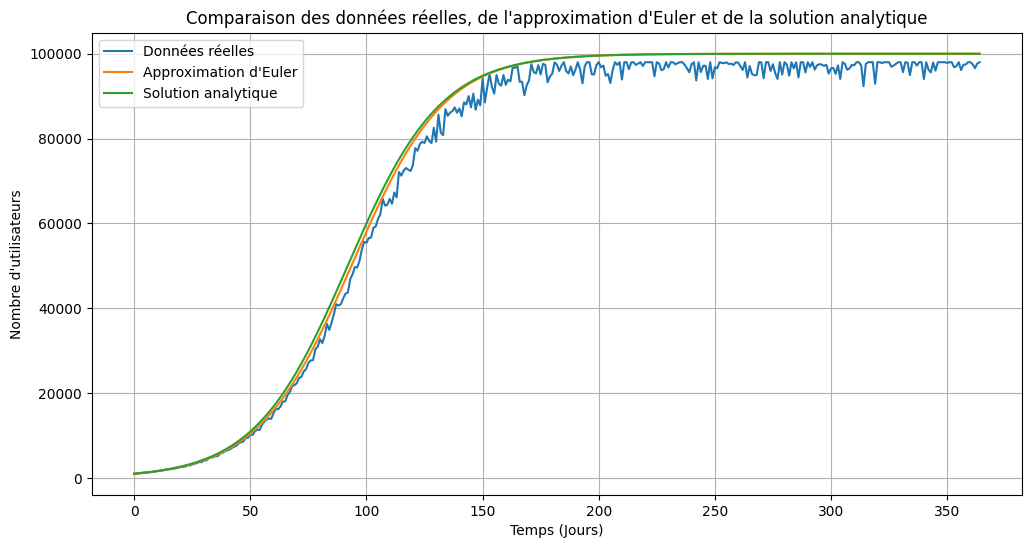

MSE avec le modèle modifié: 1724555193.130652


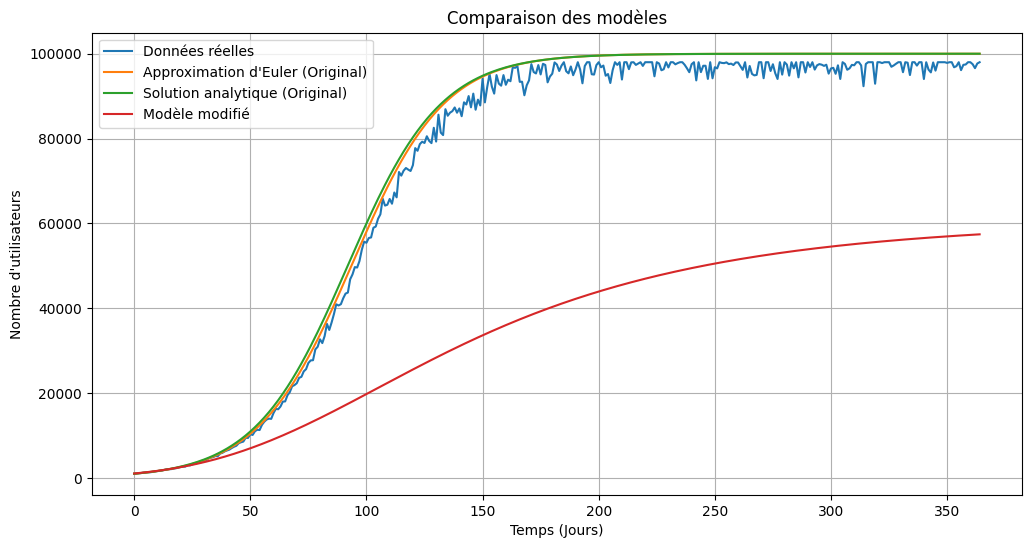

           Users        Revenue  Servers  ServerCost  MarketingCost  \
0     888.653492   10654.955365      1.0      1000.0   26386.534916   
1    1604.578844   19238.900342      1.0      1000.0   19000.333897   
2    2876.304653   34486.892793      2.0      2000.0   31717.591988   
3    5090.502185   61035.121203      3.0      3000.0   53859.567308   
4    8814.396869  105684.618461      5.0      5000.0   91098.514146   
5   14726.900611  176575.538326      8.0      8000.0  150223.551564   
6   23306.881070  279449.504034     12.0     12000.0  236023.356159   
7   34261.772612  410798.653615     18.0     18000.0  345572.271572   
8   46172.216830  553604.879797     24.0     24000.0  464676.713759   
9   57057.947562  684124.791268     29.0     29000.0  573534.021074   
10  65537.883780  785799.226518     33.0     33000.0  658333.383251   
11  71358.157053  855584.303067     36.0     36000.0  716536.115986   

           Profit  
0   -16731.579552  
1     -761.433555  
2      769.30080

<ipython-input-4-c22b50d4b56f>:285: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['MarketingCost'][0] = acquisition_cost * df['Users'][0] + marketing_budget*0.35 #Dépense initiale
<ipython-input-4-c22b50d4b56f>:286: FutureWarning: Chained

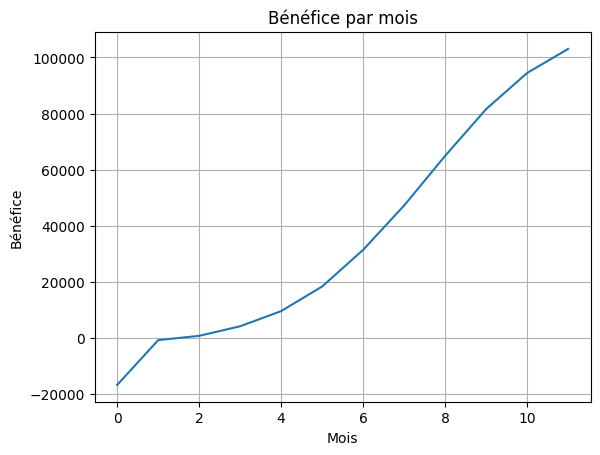

Bénéfice cumulé après un an: 438075.42916828603


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Partie 1: Modélisation et compréhension mathématique du problème

# 1. Écrire l’équation différentielle avec les valeurs du problème.
# dP/dt = r * P * (1 - P/K)
# où:
# P = population (nombre de clients) au temps t
# r = taux de croissance
# K = capacité maximale (taille du marché total)
# Avec les valeurs fournies:
# dP/dt = 0.05 * P * (1 - P/100000)

# 2. Expliquer pourquoi l’interprétation fonctionne au début de l’activité et à la fin de l’activité.
# Début: Au début, P est petit, donc P/K est proche de 0. L'équation se rapproche de dP/dt = r * P, ce qui est une croissance exponentielle.
# Fin: Lorsque P approche K, P/K approche 1, et (1 - P/K) approche 0. Cela signifie que dP/dt approche 0, la croissance ralentit.

# 3. Utiliser la méthode de discrétisation pour obtenir l’équation d’Euler qui permet d’approximer la valeur de la solution.
# P(t + dt) = P(t) + dt * dP/dt
# En substituant l'équation logistique:
# P(t + dt) = P(t) + dt * r * P(t) * (1 - P(t)/K)

# 4. Implémenter en Python cette équation en choisissant un pas approprié.
def euler_logistic(P0, r, K, dt, num_steps):
    """
    Approximation de la solution de l'équation différentielle logistique en utilisant la méthode d'Euler.

    Args:
        P0: Population initiale.
        r: Taux de croissance.
        K: Capacité maximale.
        dt: Pas de temps.
        num_steps: Nombre de pas à effectuer.

    Returns:
        Un tuple contenant les valeurs de temps et les valeurs de population à chaque pas.
    """
    time = np.arange(0, num_steps * dt, dt)
    P = np.zeros(num_steps)
    P[0] = P0

    for i in range(1, num_steps):
        P[i] = P[i-1] + dt * r * P[i-1] * (1 - P[i-1]/K)

    return time, P

# Paramètres
P0 = 1000
r = 0.05
K = 100000
dt = 1  # Pas de temps (1 jour)
num_steps = 365  # Nombre de jours dans l'année

# Exécuter la méthode d'Euler
time_euler, P_euler = euler_logistic(P0, r, K, dt, num_steps)

# Afficher les résultats
plt.plot(time_euler, P_euler)
plt.xlabel("Temps (jours)")
plt.ylabel("Population")
plt.title("Approximation de la croissance logistique par la méthode d'Euler")
plt.grid(True)
plt.show()

# Partie 2: Etude de la précision de la solution

# 1. Expliquer la cohérence de cette solution avec le lancement exponentiel et la saturation
# La solution analytique capture la croissance exponentielle initiale lorsque P est petit par rapport à K. Lorsque P approche K, la croissance ralentit.

# 2. Implémenter cette fonction
def analytical_logistic(P0, r, K, t):
    """
    Calcul la solution analytique de l'équation différentielle logistique.

    Args:
        P0: Population initiale.
        r: Taux de croissance.
        K: Capacité maximale.
        t: Temps (scalaire ou tableau).

    Returns:
        La population au temps t.
    """
    return K / (1 + (K - P0) / P0 * np.exp(-r * t))

# Calculer la solution analytique pour les mêmes valeurs de temps que Euler
P_analytical = analytical_logistic(P0, r, K, time_euler)

# Afficher les résultats
plt.plot(time_euler, P_analytical)
plt.xlabel("Temps (jours)")
plt.ylabel("Population")
plt.title("Solution analytique de la croissance logistique")
plt.grid(True)
plt.show()

# 3. Comparer les résultats d’approximations avec le résultat de cette fonction pour plusieurs valeurs en vous basant sur la MSE.

# Calculer la MSE
mse = mean_squared_error(P_analytical, P_euler) # Compare la solution analytique et Euler
print(f"Erreur quadratique moyenne (MSE): {mse}")

# 4. Tracez les courbes de votre approximation et de la solution analytique.

# Tracer les deux solutions
plt.plot(time_euler, P_euler, label="Approximation d'Euler")
plt.plot(time_euler, P_analytical, label="Solution analytique")
plt.xlabel("Temps (jours)")
plt.ylabel("Population")
plt.title("Comparaison de l'approximation d'Euler et de la solution analytique")
plt.legend()
plt.grid(True)
plt.show()

# Partie 3: Application sur des données réels et recalibrage du modèle

# 1. Tracer la courbe du nombre d’utilisateurs.

# Charger les données du fichier CSV
df = pd.read_csv("Dataset_nombre_utilisateurs.csv")
df = df.rename(columns={'Jour': 'Temps', 'Utilisateurs': 'Nombre_utilisateurs'})

# Afficher la courbe du nombre d'utilisateurs
plt.figure(figsize=(12, 6))
plt.plot(df['Temps'], df['Nombre_utilisateurs'])
plt.xlabel("Jour")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre d'utilisateurs au fil du temps")
plt.grid(True)
plt.show()

# 2. Quand est ce qu’on atteint la phase de “saturation” ? Quand est ce qu’on atteint 50% de la saturation ?

# On utilise une valeur proche du max des utilisateurs dans le dataset
K_estime = df['Nombre_utilisateurs'].max()

# Approximation du point de saturation (95% de K)
saturation_threshold = 0.95 * K_estime
saturation_day = df[df['Nombre_utilisateurs'] >= saturation_threshold]['Temps'].min()

# Approximation du jour à 50% de saturation
half_saturation = 0.5 * K_estime
half_saturation_day = df[df['Nombre_utilisateurs'] >= half_saturation]['Temps'].min()

print(f"Jour approximatif de saturation: {saturation_day}")
print(f"Jour approximatif à 50% de saturation: {half_saturation_day}")

# 3. Calculer la MSE pour les 2 solutions sur plusieurs intervalles de temps.

# Intervalles de temps (en jours)
intervals = [(0, 30), (30, 90), (90, 180), (180, 365)]

for start, end in intervals:
    # Sélectionner les données réelles dans l'intervalle
    real_data_interval = df[(df['Temps'] >= start) & (df['Temps'] <= end)]['Nombre_utilisateurs']
    #Euler
    time_interval = time_euler[(time_euler >= start) & (time_euler <= end)]
    P_euler_interval = np.interp(time_interval, time_euler, P_euler)  # Interpoler Euler values
    #Analytical
    P_analytical_interval = analytical_logistic(P0, r, K, time_interval)
    #MSE Calculation
    mse_euler = mean_squared_error(real_data_interval, P_euler_interval[:len(real_data_interval)])
    mse_analytical = mean_squared_error(real_data_interval, P_analytical_interval[:len(real_data_interval)])
    print(f"MSE entre {start} et {end} jours (Euler): {mse_euler}")
    print(f"MSE entre {start} et {end} jours (Analytique): {mse_analytical}")

# 4. Tracer simultanément les 3 courbes.

# Tracer les trois courbes
plt.figure(figsize=(12, 6))
plt.plot(df['Temps'], df['Nombre_utilisateurs'], label="Données réelles")
plt.plot(time_euler, P_euler, label="Approximation d'Euler")
plt.plot(time_euler, P_analytical, label="Solution analytique")
plt.xlabel("Temps (Jours)")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Comparaison des données réelles, de l'approximation d'Euler et de la solution analytique")
plt.legend()
plt.grid(True)
plt.show()

# 5. Expliquer pour quelle(s) raison(s) les écarts sont significatifs ?
# Les écarts peuvent être dus à:
# - Saisonnalité: L'adoption peut varier selon les périodes de l'année.
# - Campagnes marketing: Des pics peuvent être liés à des efforts marketing.
# - Facteurs externes: Événements, concurrence, économie.
# - Limitations du modèle: Le modèle logistique est une simplification.

# 6. Proposer de nouvelles hypothèses pour donner une meilleur approximation
# Hypothèses à considérer:
# - Taux de croissance variable (r): Influencé par le marketing ou la saisonnalité.
# - Capacité maximale variable (K): La taille du marché peut évoluer.
# - Incorporer des facteurs externes: Ajouter des termes pour le marketing ou autres.

# 7. Recalculer la MSE et retracer les courbes

# Exemple de modèle modifié (Taux de croissance variable)
def modified_logistic(P0, r_func, K, t):
    """
    Équation logistique avec un taux de croissance variable.
    r_func doit être une fonction qui prend le temps (t) en entrée et renvoie le taux de croissance à ce moment.
    """
    return K / (1 + (K - P0) / P0 * np.exp(-np.cumsum([r_func(ti) for ti in t])))

# Exemple de fonction de taux de croissance (peut être ajustée)
def r_func(t):
    """
    Exemple: Un taux de croissance qui diminue avec le temps.
    """
    return 0.05 * np.exp(-t / 100)  # Décroissance exponentielle du taux de croissance

# Recalculer en utilisant le modèle modifié
P_modified = modified_logistic(P0, r_func, K, time_euler)

# Calculer la MSE
mse_modified = mean_squared_error(df['Nombre_utilisateurs'], P_modified[:len(df['Nombre_utilisateurs'])])
print(f"MSE avec le modèle modifié: {mse_modified}")

# Tracer les résultats
plt.figure(figsize=(12, 6))
plt.plot(df['Temps'], df['Nombre_utilisateurs'], label="Données réelles")
plt.plot(time_euler, P_euler, label="Approximation d'Euler (Original)")
plt.plot(time_euler, P_analytical, label="Solution analytique (Original)")
plt.plot(time_euler, P_modified, label="Modèle modifié")
plt.xlabel("Temps (Jours)")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Comparaison des modèles")
plt.legend()
plt.grid(True)
plt.show()

# Partie 4: Question ouverte

# Le pôle développement de la SAS souhaite lancer un nouveau produit et veut baser son business modèle sur les résultats du business modèle précédent.
# Vous êtes mandaté pour définir un plan de projection du chiffre d’affaires et des bénéfices réalisés par mois sur l’année de lancement du produit.
# Est-ce que le business modèle est rentable ?
# Est-ce qu’il manque des hypothèses ?
# Voici les informations dont vous disposez:
# - Le nombre d’utilisateurs maximum par serveur: 2000
# - Prix d’un serveur par mois: 1000 euros
# - Estimation du coût marketing marginal d'acquisition par utilisateur 10 euros
# - Budget de campagne marketing corporate branding concentré à 35% au lancement du produit puis réparti équitablement sur le reste du mois: 50 000 euros
# - Coût de l’abonnement mensuel du nouveau produit: 11,99 euros/mois
# - Estimation de la taille du marché: 400 000 utilisateurs
# - Part de marché: 20%
# - Croissance initial moyennement rapide
# - Nombre initial d’utilisateur au lancement: 500

def business_model(P0, r, K, months, subscription_price, server_capacity, server_cost, acquisition_cost, marketing_budget):
    """
    Simule le modèle économique sur une année.

    Args:
        P0: Nombre initial d'utilisateurs.
        r: Taux de croissance.
        K: Capacité maximale (taille du marché * part de marché).
        months: Nombre de mois à simuler.
        subscription_price: Prix de l'abonnement mensuel par utilisateur.
        server_capacity: Nombre d'utilisateurs par serveur.
        server_cost: Coût mensuel par serveur.
        acquisition_cost: Coût marginal d'acquisition par utilisateur.
        marketing_budget: Budget marketing total.

    Returns:
        Un DataFrame Pandas avec les revenus, les coûts et les bénéfices mensuels.
    """

    # Calculer le nombre d'utilisateurs par mois
    time = np.arange(0, months, 1/30)
    users = analytical_logistic(P0, r, K, time*30)
    df = pd.DataFrame({'Users': users})
    df=df.groupby(df.index // 30).agg({'Users':'last'})

    # Calculer les revenus
    df['Revenue'] = df['Users'] * subscription_price

    # Calculer les coûts de serveur
    df['Servers'] = np.ceil(df['Users'] / server_capacity)
    df['ServerCost'] = df['Servers'] * server_cost

    # Calculer les coûts marketing
    df['MarketingCost'] = acquisition_cost * df['Users'] + marketing_budget/months
    df['MarketingCost'][0] = acquisition_cost * df['Users'][0] + marketing_budget*0.35 #Dépense initiale
    df['MarketingCost'][1:] = acquisition_cost * df['Users'][1:] + (marketing_budget*(1-0.35))/(months-1) #Mois restants

    # Calculer les bénéfices
    df['Profit'] = df['Revenue'] - df['ServerCost'] - df['MarketingCost']

    return df

# Paramètres
P0 = 500
r = 0.02  # Ajustement du taux de croissance (moyennement rapide)
K = 400000 * 0.2  # Part de marché de la taille totale du marché
months = 12
subscription_price = 11.99
server_capacity = 2000
server_cost = 1000
acquisition_cost = 10
marketing_budget = 50000

# Exécuter la simulation du modèle économique
results = business_model(P0, r, K, months, subscription_price, server_capacity, server_cost, acquisition_cost, marketing_budget)

# Afficher les résultats
print(results)

# Tracer les résultats
plt.plot(results.index, results['Profit'])
plt.xlabel("Mois")
plt.ylabel("Bénéfice")
plt.title("Bénéfice par mois")
plt.grid(True)
plt.show()

# Est-ce rentable?
cumulative_profit = results['Profit'].sum()
print(f"Bénéfice cumulé après un an: {cumulative_profit}")